# Surrogate Construction for Genz Functions
## As a function of the number of quadrature points

This notebook constructs a PC surrogate for Genz functions using full and sparse quadrature, giving the root mean square error between the surrogate and the actual function.

In [1]:
# imports
import numpy as np
import math  
import matplotlib.pyplot as plt
import pandas as pd

import PyUQTk.pce as uqtkpce
import PyUQTk.PyPCE.pce_tools as pce_tools
from PyUQTk.utils.func import *

from surrogate_tools import *

PyMC is required for some of the MCMC postprocessing codes.
Will proceed without, but some convergence tests will not be available.


## Inputs

In [2]:
nord = 4            # Order of the PCE
pc_type = "HG"      # Polynomial type
pc_alpha = 0.0      # Free parameter > -1 for Gamma-Laguerre and Beta-Jacobi PCs
pc_beta = 1.0       # Free parameter > -1 for Gamma-Laguerre and Beta-Jacobi PCs
nSam = 100000       # Number of random samples
ndim = 2            # Number of dimensions
model= 'genz_osc'   # Choices are 'genz_osc', 'genz_exp', 'genz_cont','genz_gaus','genz_cpeak', 'genz_ppeak'
#q_pts = 10          # Maximum number of quad points per dimension (go 

We define the range of quadrature points we will be using.

In [3]:
num_points=range(1,q_pts+1)
tot_pts=[i**ndim for i in num_points]

## Finding the Errors

We loop through different values of the number of quadrature points per dimension, performing full and sparse quadrature on each and obtaining the RMSE. We use both regression and Galerkin projection.

In [4]:
q_errors=np.zeros((4, q_pts)) #array to store quad errors

#Loop though different values for number of quad points per dimension
for i in range(q_pts):
    f_actual, pce_evals= surrogate(nord, ndim, pc_type, pc_alpha, pc_beta, i+1, 'full', model, 'galerkin', nSam)
    f_actual2, pce_evals2=surrogate(nord, ndim, pc_type, pc_alpha, pc_beta, i+1, 'full', model, 'regression', nSam)
    f_actual3, pce_evals3=surrogate(nord, ndim, pc_type, pc_alpha, pc_beta, i+1, 'sparse', model, 'galerkin', nSam)
    f_actual4, pce_evals4=surrogate(nord, ndim, pc_type, pc_alpha, pc_beta, i+1, 'sparse', model, 'regression', nSam)

    q_errors[0][i]= math.sqrt(np.square(np.subtract(f_actual,pce_evals)).mean())
    q_errors[1][i]= math.sqrt(np.square(np.subtract(f_actual2,pce_evals2)).mean())
    q_errors[2][i]= math.sqrt(np.square(np.subtract(f_actual3,pce_evals3)).mean())
    q_errors[3][i]= math.sqrt(np.square(np.subtract(f_actual4,pce_evals4)).mean())

## Summary
This table and figure display the error of each method of quadrature as the total quadrature points varies.

In [7]:
pd.DataFrame(data=np.transpose(q_errors), columns=['Full and Galerkin', 'Full and Regression', 'Sparse and Galerkin', 'Sparse and Regression'])

,Full and Galerkin,Full and Regression,Sparse and Galerkin,Sparse and Regression
0,0.840134,0.806194,0.359690,0.767642
1,0.480830,0.946510,0.023983,0.018399
2,0.103560,0.153004,0.010140,0.046424
3,0.012879,0.020615,0.010573,0.193046
4,0.011148,0.040391,0.009611,0.475199
5,0.011770,0.069126,0.009681,0.649814
6,0.010724,0.103268,0.010486,0.661713
7,0.010148,0.141409,1.365226,0.653776
8,0.011312,0.181296,1.302061,0.650080
9,0.013022,0.223380,1.296746,0.651661


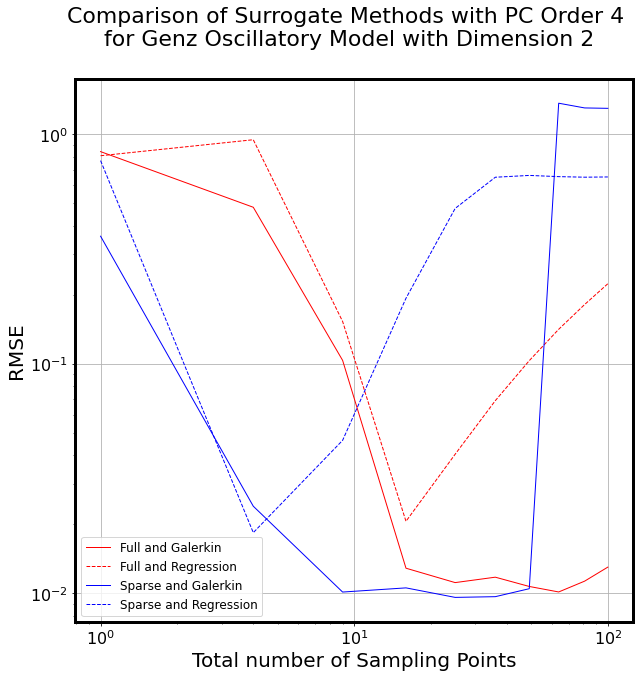

In [18]:
#Create figure
fig, ax = plt.subplots(figsize=(10,10))
#Plot Quadrature Data
plt.plot(tot_pts, q_errors[0], color='r', label='Full and Galerkin')
plt.plot(tot_pts, q_errors[1], color='r', linestyle='dashed', label='Full and Regression')
plt.plot(tot_pts, q_errors[2], color='b', label='Sparse and Galerkin')
plt.plot(tot_pts, q_errors[3], color='b', linestyle='dashed', label='Sparse and Regression')

#Label Axes
plt.xlabel("Total number of Sampling Points",fontsize=20)
plt.ylabel("RMSE",fontsize=20)
#Create legend
plt.legend(loc='lower left')

#Model titles to be displayed
if model=="genz_osc":
    model_title="Genz Oscillatory"
elif model=="genz_gaus":
    model_title="Genz Gaussian"
elif model=="genz_ppeak":
    model_title="Genz Product-Peak"
elif model=="genz_cpeak":
    model_title="Genz Corner-Peak"
elif model=="genz_exp":
    model_title="Genz Exponential"
else:
    model_title="Genz Continuous"

#Add title
fig.suptitle("Comparison of Surrogate Methods with PC Order %s\n for %s Model with\
 Dimension %s"%(nord, model_title, str(ndim)), fontsize=22)
#Make scales logarithmic
plt.yscale('log')
plt.xscale('log')
#Change size of tick labels
plt.tick_params(axis='both', labelsize=16)

#Show figure
plt.show() 